In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri


import matplotlib.animation as animation
# plt.rcParams["figure.figsize"] = (10,5)

In [2]:
def inCircumcircle(vertex1, vertex2, vertex3, point):
    x1, y1 = vertex1
    x2, y2 = vertex2
    x3, y3 = vertex3
    
    x, y = point
    
    # finding circumcenter
    a1 = x1 - x2
    a2 = x2 - x3
    b1 = y1 - y2
    b2 = y2 - y3
    d1 = x1**2 - x2**2 + y1**2 - y2**2
    d2 = x2**2 - x3**2 + y2**2 - y3**2
    
    # cramers rule
    D = 4 * ( (a1*b2) - (a2*b1) )
    Dx = 2 * ( (d1*b2) - (d2*b1) )
    Dy = 2 * ( (a1*d2) - (a2*d1) )
    
    xc, yc = Dx/D, Dy/D
    
    # circumradius squared
    R_sq = ((x1 - xc)**2 + (y1 - yc)**2)
#     R_sq2 = ((x2 - xc)**2 + (y2 - yc)**2)
#     R_sq3 = ((x3 - xc)**2 + (y3 - yc)**2)
    
    # distance to point from circumcenter - squared
    dist_sq = ((x - xc)**2 + (y - yc)**2)
    
#     print(R_sq, R_sq2, R_sq3, dist_sq, xc, yc)
    
    return dist_sq < R_sq
#     return xc, yc, R_sq

In [3]:
# testing the function

ver1 = (1.8, 3.26)
ver2 = (3.3, -1.07)
ver3 = (-2.7, -2.1)
pt = (4, 1.3698)

print(inCircumcircle(ver2, ver3, ver1, pt))

False


In [5]:
def myTriplot(point_list, triangle_list):
    x = point_list[:, 0]
    y = point_list[:, 1]
    
    plt.scatter(x, y, c='r', s=15)
    
    for i in range(len(x)):
        plt.annotate(i, (x[i]+0.005, y[i]+0.005), color='red')
    
    for triangle in triangle_list:
        plt.plot( [x[triangle[0]], x[triangle[1]], x[triangle[2]], x[triangle[0]]],
                  [y[triangle[0]], y[triangle[1]], y[triangle[2]], y[triangle[0]]], color='black', linewidth=1)
    
    plt.title('Karthik')

In [8]:
num_of_points = 20

x_sample = np.random.uniform(0, 1, (num_of_points, 2))
# x_sample.sort(axis=0)

In [11]:
# triangulation function

def triangulate(points):
    n = len(points)
    
#     # sort in ascending x
#     points.sort(axis=0)
    x = points[:, 0]
    y = points[:, 1]
    
    # define super triangle
    x_new = np.append(x, [-5, +5, 0])
    y_new = np.append(y, [-5, -5, 5])
    
    # triangles list
    triangles = [[n, n+1, n+2]]
    complete_triangles = []
    
    # main loop
    for i in range(len(points)):
        edges = []
        bad_triangles = []
        
        for triangle in triangles:
            v1 = (x_new[triangle[0]], y_new[triangle[0]])
            v2 = (x_new[triangle[1]], y_new[triangle[1]])
            v3 = (x_new[triangle[2]], y_new[triangle[2]])
            xi, yi = x[i], y[i]
            
            test = inCircumcircle(v1, v2, v3, (x[i], y[i]))
            
            if (test):
                edges.extend( [[triangle[0], triangle[1]],
                               [triangle[1], triangle[2]],
                               [triangle[2], triangle[0]]])
                bad_triangles.append(triangle)
        
        for triangle in bad_triangles:
            if triangle in bad_triangles:
                triangles.remove(triangle)
        
        # remove duplicate edges
        isUnique = [1] * len(edges)
        for j in range(len(edges)):
            for k in range(len(edges)):
                if (set(edges[j]) == set(edges[k])) and (j!=k):
                    isUnique[j] = 0
        edges = [edges[k] for k in range(len(edges)) if isUnique[k]]

        # form new triangles
        for edge in edges:
            triangles.append([edge[0], edge[1], i])
        
        print(i+1, len(triangles), 2*(i+1)+1, len(triangles)-(2*(i+1)+1))
    
    # remove all triangles having the points of super triangle
    triangles_copy = triangles.copy()
    for triangle in triangles_copy:
        if triangle[0] >= n or triangle[1] >= n or triangle[2] >= n:
            triangles.remove(triangle)
    
    print('end', len(triangles))
    return triangles

tri1 = triangulate(x_sample)

1 3 3 0
2 5 5 0
3 7 7 0
4 9 9 0
5 11 11 0
6 13 13 0
7 15 15 0
8 17 17 0
9 19 19 0
10 21 21 0
11 23 23 0
12 25 25 0
13 27 27 0
14 29 29 0
15 31 31 0
16 33 33 0
17 35 35 0
18 37 37 0
19 39 39 0
20 41 41 0
end 28


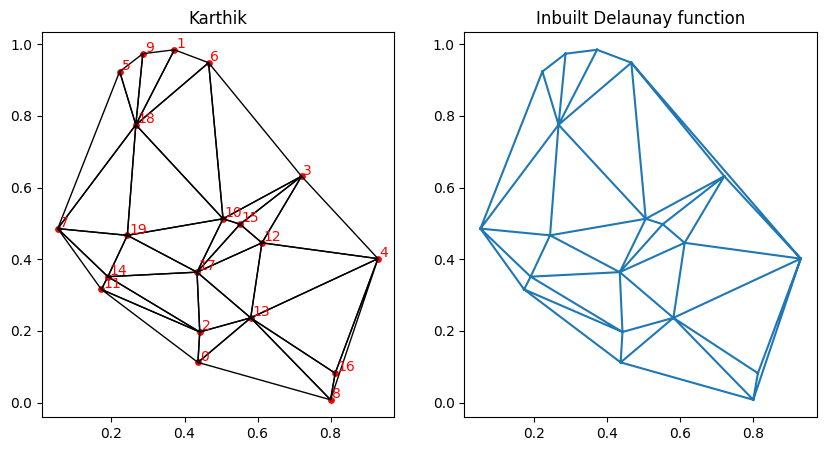

In [10]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
myTriplot(x_sample, tri1)

plt.subplot(1, 2, 2)
triang = mtri.Triangulation(x_sample[:, 0], x_sample[:, 1])
plt.triplot(triang)
plt.title('Inbuilt Delaunay function')
plt.show()

plt.show()

In [8]:
x_prob = [0.0686101,0.1682831,0.28591438,0.38202841,0.73720612,0.89206556]
y_prob = [0.97803841,0.35200699,0.70156263,0.28936762,0.86115149,0.49468709]

pts_prob = np.array([[x_prob[i], y_prob[i]] for i in range(len(x_prob))])

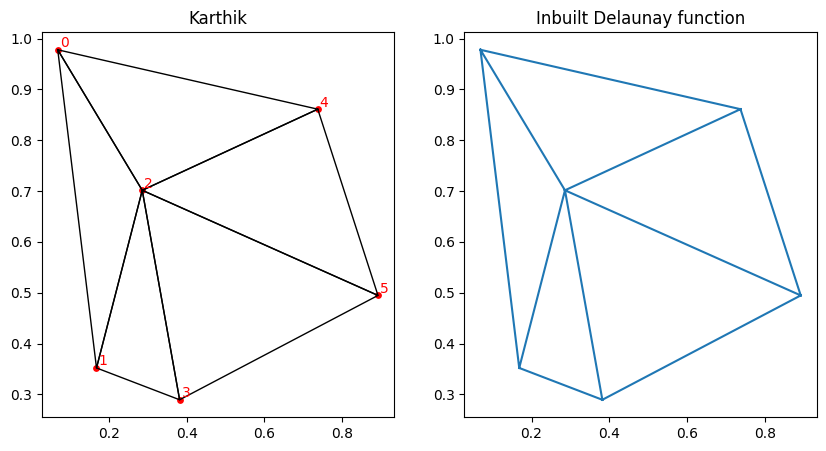

In [9]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
tri2 = triangulate(pts_prob)
myTriplot(pts_prob, tri2)

plt.subplot(1, 2, 2)
triang = mtri.Triangulation(pts_prob[:, 0], pts_prob[:, 1])
plt.triplot(triang)
plt.title('Inbuilt Delaunay function')
plt.show()

plt.show()

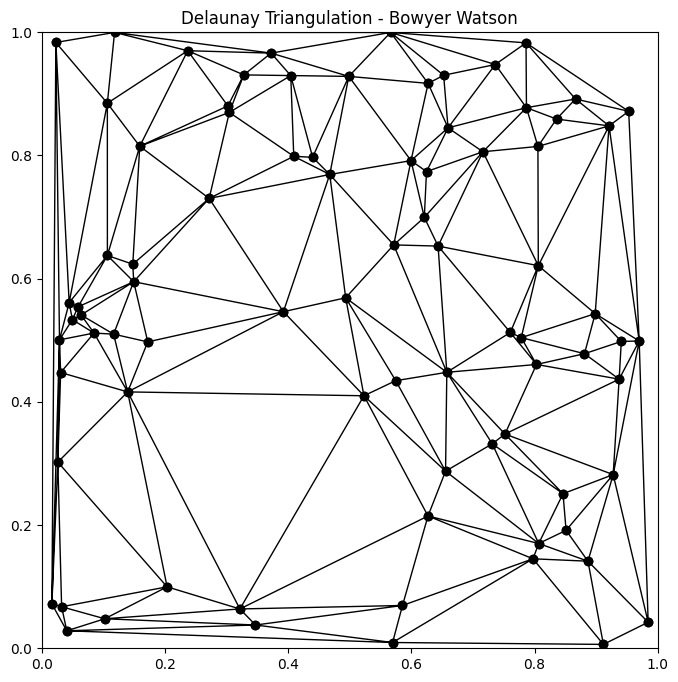

In [30]:
# create animation of bowyer watson algorithm

import matplotlib.animation as animation

pts_anim = np.random.rand(82, 2) 

x_anim = pts_anim[:,0]
y_anim = pts_anim[:,1]

sort_indices = np.argsort(x_anim)

x_anim = x_anim[sort_indices]
y_anim = y_anim[sort_indices]

fig, ax = plt.subplots(figsize=(8,8))


def update(num):
    ax.cla()
    ax.set_title('Delaunay Triangulation - Bowyer Watson')
    ax.scatter(x_anim, y_anim, color='black')
    ax.set_aspect('equal')
    ax.set(xlim=(0,1),ylim=(0,1))
    triang = mtri.Triangulation(x_anim[:3+num], y_anim[:3+num])
    ax.triplot(triang, 'ko-', lw=1)
    return fig,

ani = animation.FuncAnimation(fig, update, 80,interval=1800, blit=True)
ani.save('delaunay_anim50.mp4', writer="ffmpeg",dpi=100)

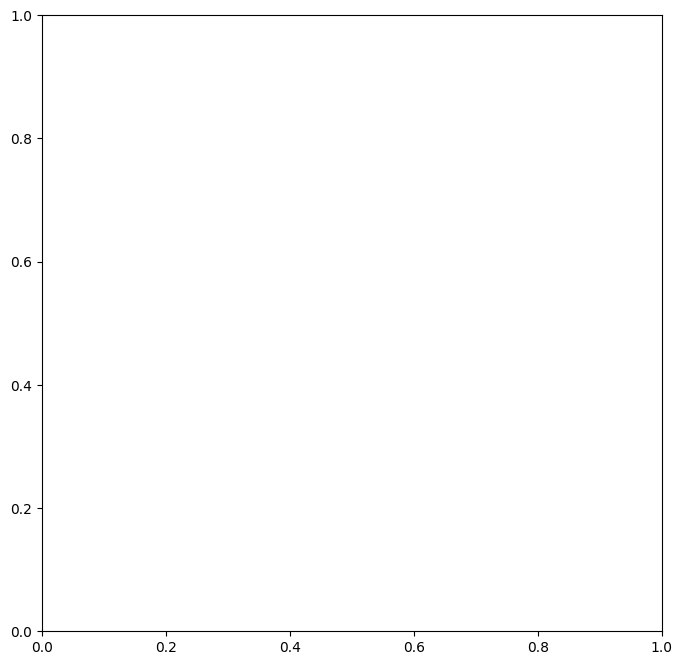

In [47]:
# create animation of bowyer watson algorithm



num_points = 82

pts_anim = np.random.rand(num_points, 2) 

x_anim = pts_anim[:,0]
y_anim = pts_anim[:,1]

sort_indices = np.argsort(x_anim)

x_anim = x_anim[sort_indices]
y_anim = y_anim[sort_indices]



x_velocities1 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)
y_velocities1 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)

x_velocities2 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)
y_velocities2 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)

x_velocities3 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)
y_velocities3 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)

x_velocities4 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)
y_velocities4 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)

x_velocities5 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)
y_velocities5 = np.random.uniform(low=-0.8, high = +0.8, size=num_points)

In [52]:
fig, ax = plt.subplots(figsize=(8,8))

def update(num):
    # update coordinates
    t = num/5000
    
#     x_i = x_anim
#     y_i = y_anim
    
    x_i = x_anim + t*x_velocities1
    y_i = y_anim + t*y_velocities1
    
    ax.cla()
    ax.set_title('Delaunay Triangulation')
    ax.scatter(x_i, y_i, color='black')
    ax.set_aspect('equal')
    ax.set(xlim=(0,1),ylim=(0,1))
    triang = mtri.Triangulation(x_i, y_i)
    ax.triplot(triang, 'ko-', lw=1)
    return fig,

ani = animation.FuncAnimation(fig, update, 5000,interval= 10, blit=True)
ani.save('cool_animation4.mp4', writer="ffmpeg",dpi=100)

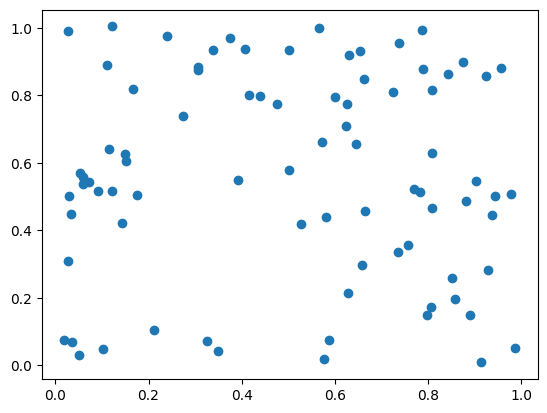

In [33]:
plt.scatter(x_i, y_i)

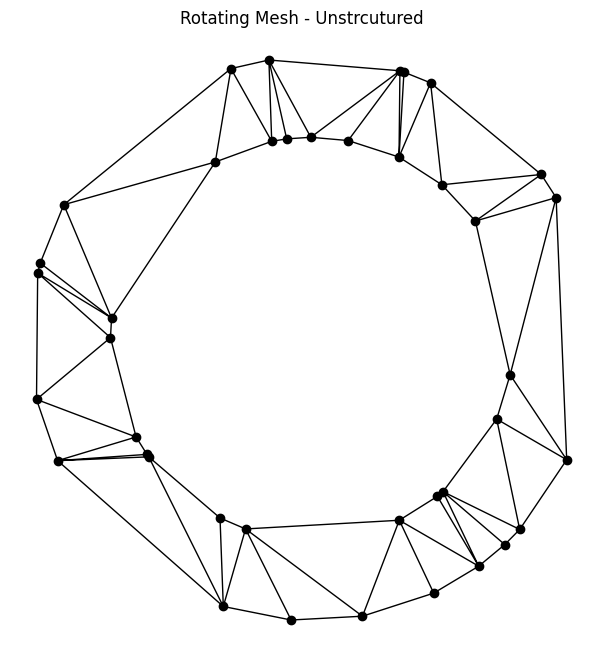

In [75]:
fig, ax = plt.subplots(figsize=(8,8))

# # 1 iteration to obtain the mask
# theta = 2*np.pi*np.random.rand(20)
# rad1 = 5
# x_circ1 = rad1 * np.cos(theta)
# y_circ1 = rad1 * np.sin(theta)

# theta2 = theta + 0.5
# rad2 = 7
# x_circ2 = rad2 * np.cos(theta2)
# y_circ2 = rad2 * np.sin(theta2)

# x_circ = np.append(x_circ, x_circ2)
# y_circ = np.append(y_circ, y_circ2)

# triang = mtri.Triangulation(x_circ, y_circ)
# triangles = triang.triangles

# x_centroids = (x_circ[triangles[:,0]] + x_circ[triangles[:,1]] + x_circ[triangles[:,2]])/3
# y_centroids = (y_circ[triangles[:,0]] + y_circ[triangles[:,1]] + y_circ[triangles[:,2]])/3
# cent_dist_sq = np.square(x_centroids) + np.square(y_centroids)

# mask = cent_dist_sq < rad1**2

theta =  2*np.pi*np.random.rand(20)

def update2(num):
    # update coordinates
    t = 2*np.pi * num/5000
    
    
    x_circ = rad1 * np.cos(theta)
    y_circ = rad1 * np.sin(theta)

    theta2 = theta + t
   
    x_circ2 = rad2 * np.cos(theta2)
    y_circ2 = rad2 * np.sin(theta2)
    
    # combine
    x_circ = np.append(x_circ, x_circ2)
    y_circ = np.append(y_circ, y_circ2)
    
    ax.cla()
    ax.set_title('Rotating Mesh - Unstrcutured')
    ax.set_aspect('equal')
#     ax.set(xlim=(0,1),ylim=(0,1))
    triang = mtri.Triangulation(x_circ, y_circ)
    triangles = triang.triangles

    x_centroids = (x_circ[triangles[:,0]] + x_circ[triangles[:,1]] + x_circ[triangles[:,2]])/3
    y_centroids = (y_circ[triangles[:,0]] + y_circ[triangles[:,1]] + y_circ[triangles[:,2]])/3
    cent_dist_sq = np.square(x_centroids) + np.square(y_centroids)
    
    triang.set_mask(cent_dist_sq < rad1**2)
    
    ax.triplot(triang, 'ko-', lw=1)
    ax.axis('off')
    return fig,

ani = animation.FuncAnimation(fig, update2, 3000,interval= 10, blit=True)
ani.save('rotating_mesh.mp4', writer="ffmpeg",dpi=100)

(-7.695394221390187, 7.604485554402314, -7.672348877958708, 7.696865332002966)

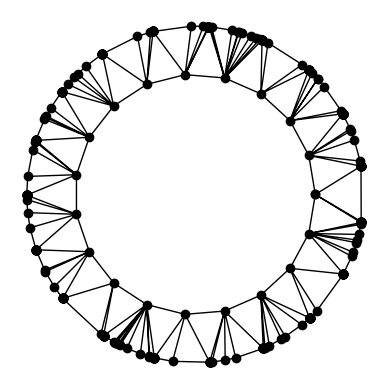

In [70]:
theta = 2*np.pi*np.random.rand(15)
rad1 = 5
x_circ1 = rad1 * np.cos(theta)
y_circ1 = rad1 * np.sin(theta)

theta2 = theta + 0.5
rad2 = 7
x_circ2 = rad2 * np.cos(theta2)
y_circ2 = rad2 * np.sin(theta2)

x_circ = np.append(x_circ, x_circ2)
y_circ = np.append(y_circ, y_circ2)

triang = mtri.Triangulation(x_circ, y_circ)
triangles = triang.triangles

x_centroids = (x_circ[triangles[:,0]] + x_circ[triangles[:,1]] + x_circ[triangles[:,2]])/3
y_centroids = (y_circ[triangles[:,0]] + y_circ[triangles[:,1]] + y_circ[triangles[:,2]])/3
cent_dist_sq = np.square(x_centroids) + np.square(y_centroids)
mask1 = cent_dist_sq < inner_radius_sq
triang.set_mask(mask1)

# plt.scatter(x_centroids, y_centroids)
plt.triplot(triang, 'ko-', lw=1)
plt.gca().set_aspect('equal')
plt.axis('off')

In [12]:
(x_circ+x_circ2).shape

(20,)

In [45]:
k = np.array([1, 2, 3])
k**2

array([1, 4, 9])

In [47]:
np.square(k) + k

array([ 2,  6, 12])

In [71]:
print(mask1)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]


In [66]:
np.random.rand(20).shape

(20,)

In [67]:
mask.shape

(75,)